In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [4]:
df = pd.read_csv('IPL Dataset 2008-2022.csv')
df

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [3]:
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [4]:
df.corr(numeric_only="true")

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
ID,1.000000,0.002039,0.009295,0.001006,0.024467,-0.012086,0.022082,0.001513,-0.000873
innings,0.002039,1.000000,-0.050497,-0.004535,-0.005425,0.000203,-0.005422,0.000765,0.000340
overs,0.009295,-0.050497,1.000000,-0.003695,0.084464,0.001674,0.085457,-0.001689,0.073935
ballnumber,0.001006,-0.004535,-0.003695,1.000000,0.004527,0.000162,0.004596,-0.002286,0.004143
batsman_run,0.024467,-0.005425,0.084464,0.004527,1.000000,-0.140860,0.977595,0.019828,-0.170370
extras_run,-0.012086,0.000203,0.001674,0.000162,-0.140860,1.000000,0.070692,-0.001889,-0.041472
total_run,0.022082,-0.005422,0.085457,0.004596,0.977595,0.070692,1.000000,0.019575,-0.180473
non_boundary,0.001513,0.000765,-0.001689,-0.002286,0.019828,-0.001889,0.019575,1.000000,-0.002197
isWicketDelivery,-0.000873,0.000340,0.073935,0.004143,-0.170370,-0.041472,-0.180473,-0.002197,1.000000


<Axes: >

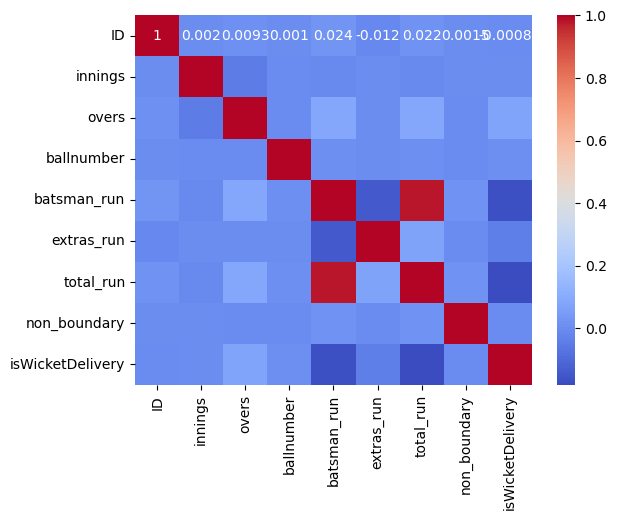

In [6]:
sns.heatmap(data=df.corr(numeric_only='true'),annot=True, cmap='coolwarm')

/home/aman-chaurasia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aman-chaurasia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


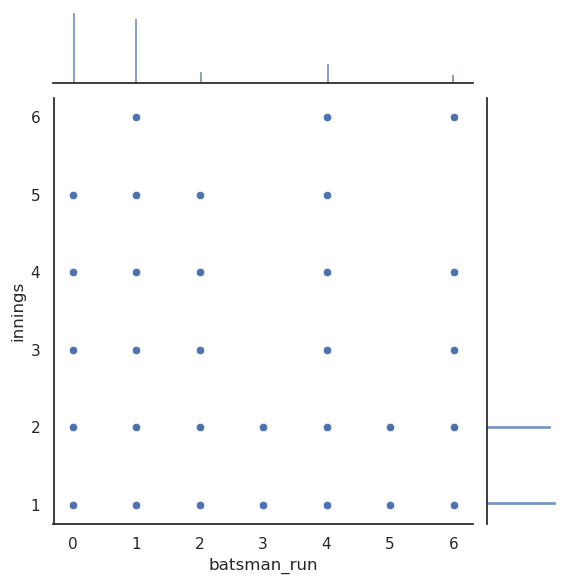

In [8]:
df_Time_web_Amount=df.filter({"batsman_run","innings"})
sns.set(style="white", color_codes=True)
sns.color_palette()
sns.jointplot(x="batsman_run",y="innings", data=df_Time_web_Amount)

<Axes: >

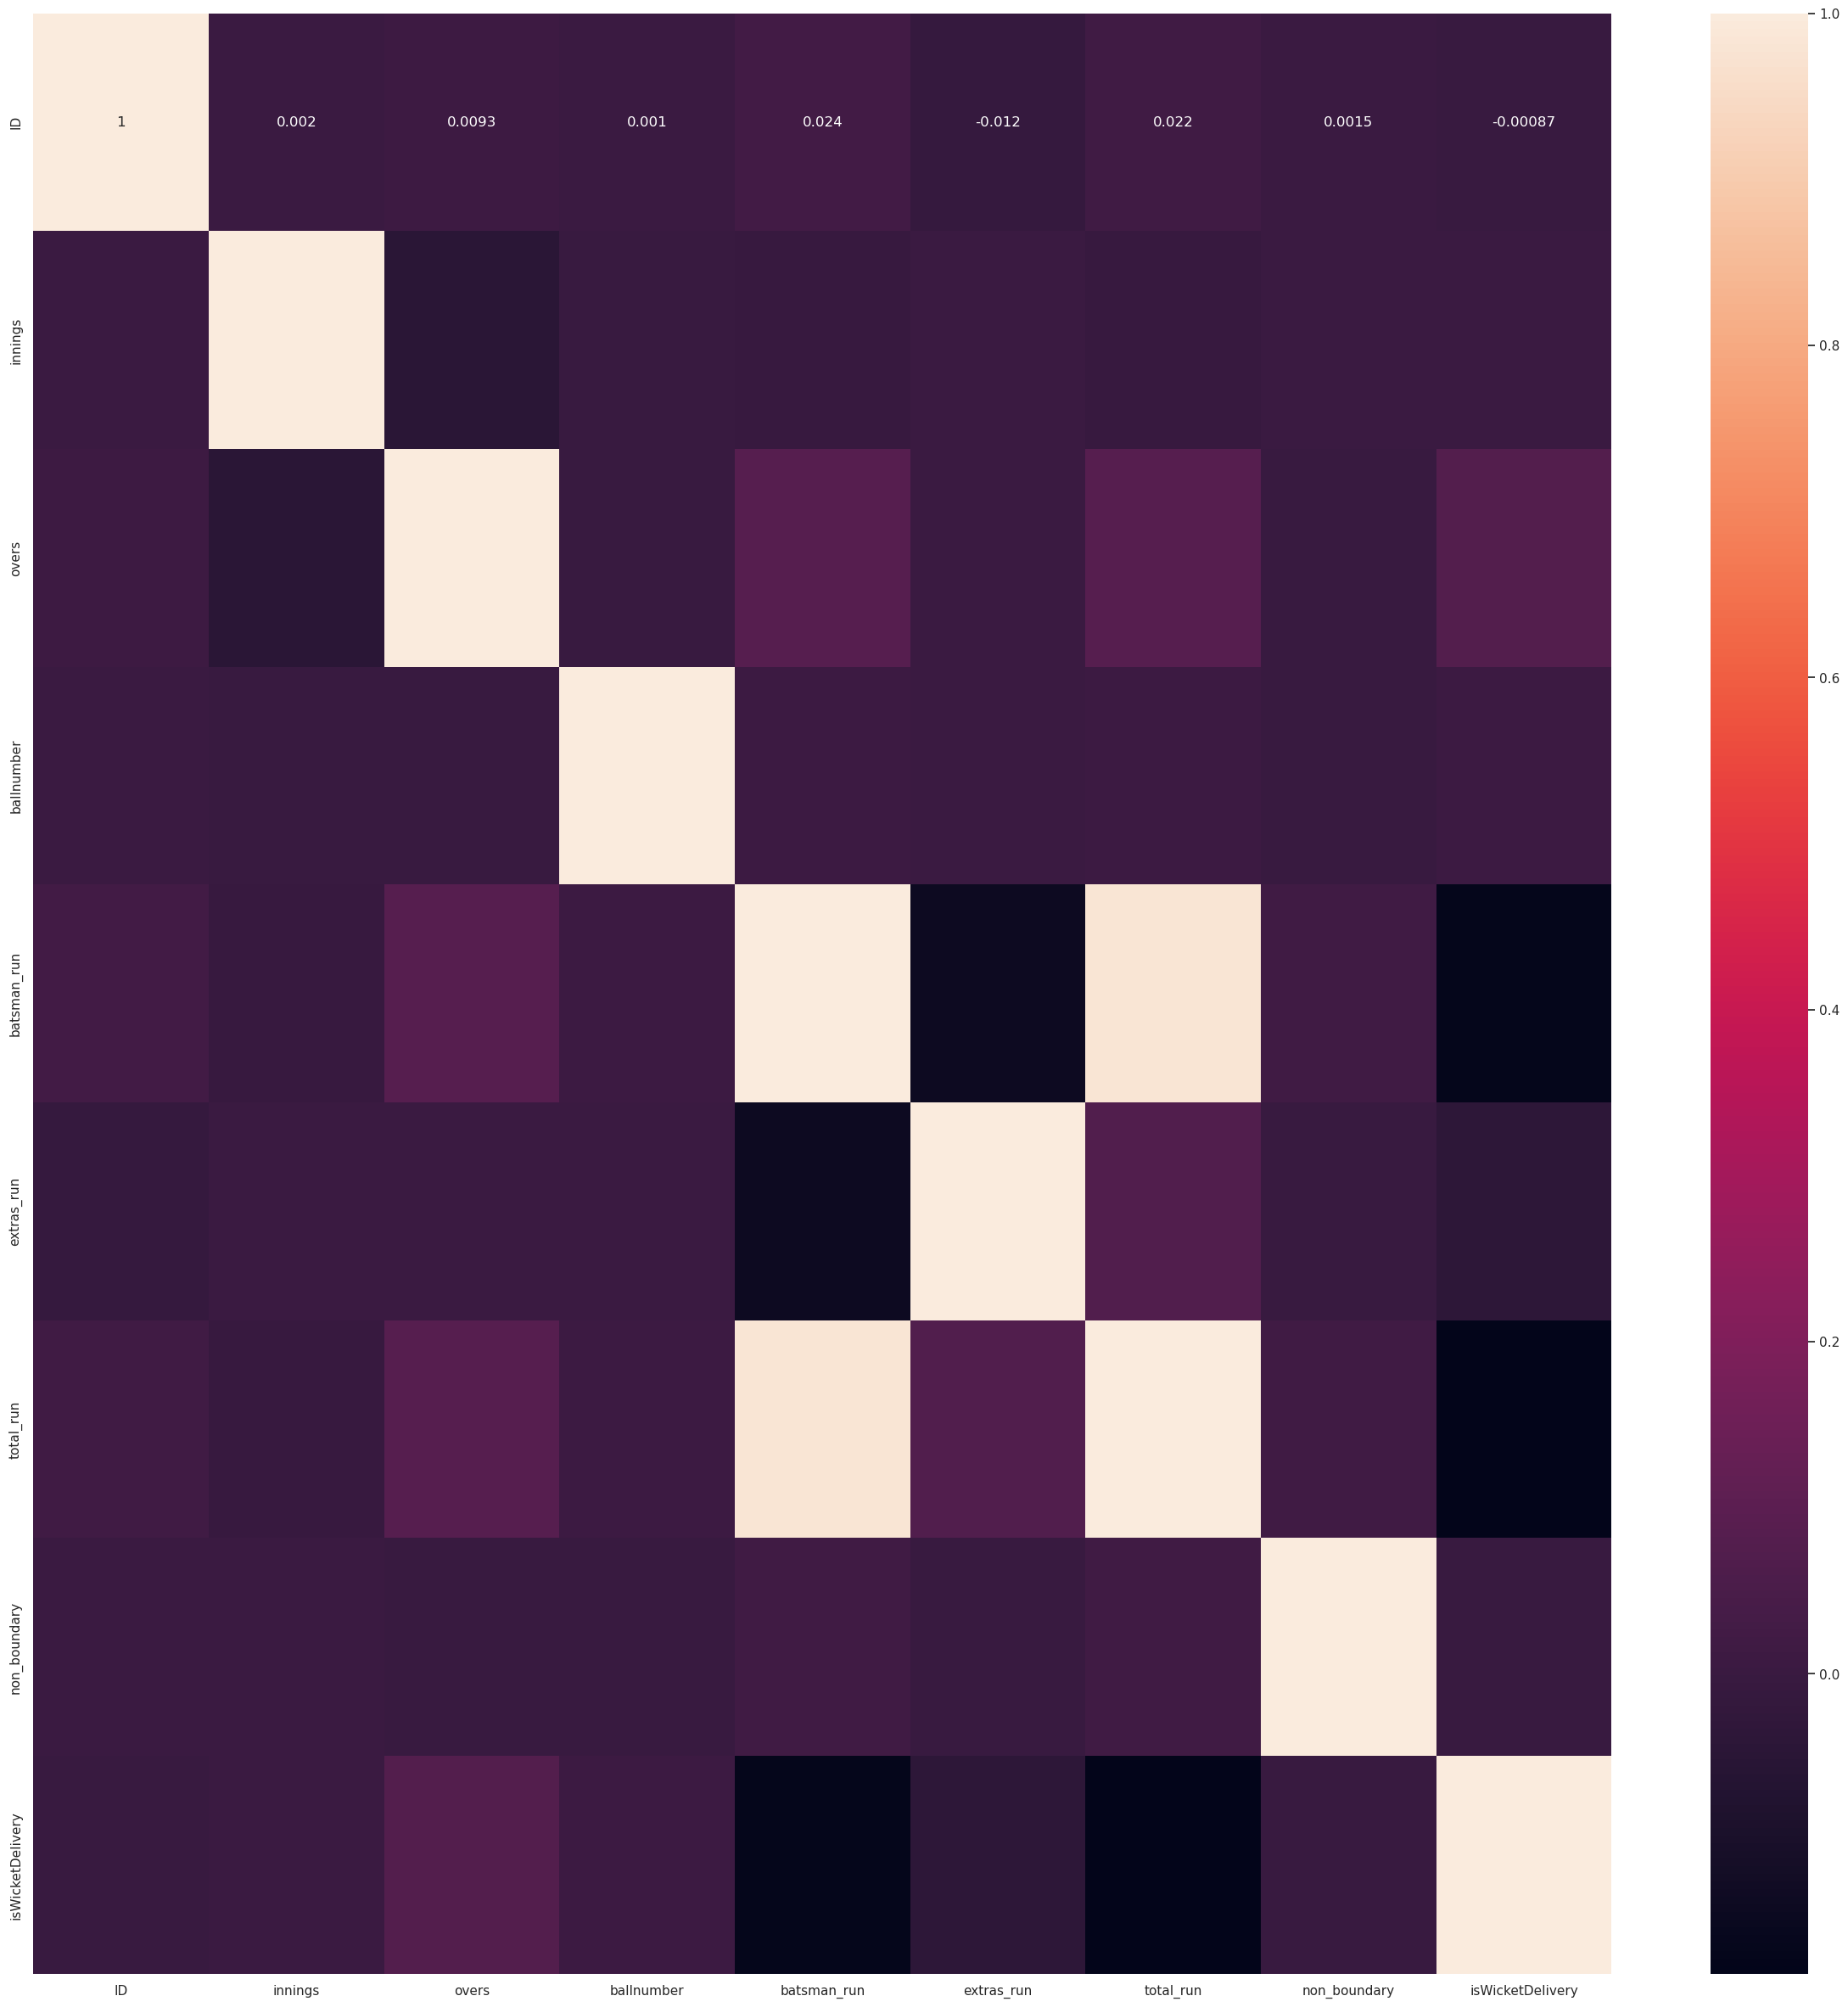

In [10]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(numeric_only="TRUE"),annot= True)

In [12]:
target = 'batsman_run'

In [79]:
X=df.drop(columns=["batsman_run","total_run"]).dropna(axis=1)
y=df[target]

In [81]:
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = LabelEncoder().fit_transform(X[col])


In [83]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_train

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extras_run,non_boundary,isWicketDelivery,BattingTeam
195074,419121,1,14,2,296,223,593,0,0,0,6
61483,1136619,1,5,3,462,401,578,0,0,0,17
31719,1254060,1,19,4,256,63,521,1,0,0,8
9774,1304080,2,1,5,396,245,130,0,0,0,2
81048,1082627,2,12,4,507,276,588,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...
119879,734027,2,12,2,569,401,590,0,0,0,16
103694,829823,2,19,3,333,332,418,0,0,0,0
131932,598071,1,5,1,462,404,116,0,0,0,17
146867,598009,2,6,1,291,184,41,0,0,0,11


In [87]:
y_train

195074    2
61483     1
31719     0
9774      0
81048     0
         ..
119879    0
103694    6
131932    0
146867    1
121958    0
Name: batsman_run, Length: 180763, dtype: int64

In [89]:
l_model = LinearRegression()

In [91]:
# Train the model on the training data
l_model.fit(X_train, y_train)

LinearRegression()

In [93]:
d_model = DecisionTreeRegressor()
d_model.fit(X_train, y_train)


DecisionTreeRegressor()

In [95]:
y_pred_d = d_model.predict(X_test)

In [99]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [101]:
y_pred_r=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred_r)
print(mse)
#root mean squrae error
rmse=np.sqrt(mse)
print("the root mean square error are:",rmse)

2.7635599322874027
the root mean square error are: 1.662395841034079
